<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/DietHabbits_UK_DimRecAutoEnco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given a data set of average eating habits between countries in the United Kingdom, does any particular country stand out  as different **

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 
Running the import line below to read in the data**

In [ ]:
Url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/UK_foods.csv'

In [ ]:
df = pd.read_csv(Url,index_col='Unnamed: 0')

Display the Data

In [ ]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


 Transpose the DataFrame so that the columns are now the index.**

In [ ]:
df=df.transpose()

In [ ]:
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**Creating a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

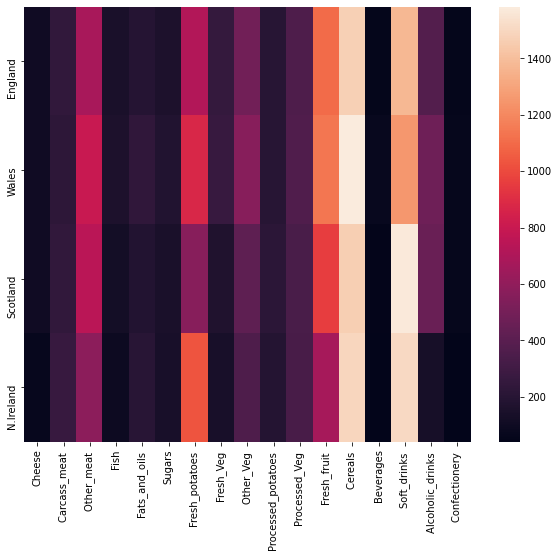

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

building an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Creating an encoder.**

In [ ]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu'))
encoder.add(Dense(units=2,activation='relu'))

**Creating a decoder**

In [ ]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))#As ouput should match variables

**Combining the encoder and decoder to be an autoencoder and compile the model.**

In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.25))

**Create a MinMaxScaler to scale the data**

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_df = scaler.fit_transform(df.values)

In [ ]:
scaled_df.shape

(4, 17)

**Fiting the autoencoder to the scaled data for 15 epochs.**

In [ ]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 1ms/step - loss: 0.4148
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 0.3164
Epoch 3/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2767
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2995
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2548
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 13/15
1/1 [==============================] - 0s 2ms/step - loss: 0.

**Running the scaled data through only the encoder and predict the reduced dimensionalty output.**

In [ ]:
encoded_2d = encoder.predict(scaled_df)

In [ ]:
encoded_2d 

array([[0.62121075, 0.        ],
       [1.5245595 , 0.        ],
       [0.42936942, 0.        ],
       [0.05178743, 0.        ]], dtype=float32)

**Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [ ]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [ ]:
results = pd.DataFrame(data=encoded_2d,
                       index=df.index,
                       columns=['C1','C2'])

In [ ]:
results

,C1,C2
England,0.621211,0.0
Wales,1.524559,0.0
Scotland,0.429369,0.0
N.Ireland,0.051787,0.0


In [ ]:
results = results.reset_index()

In [ ]:
results

,index,C1,C2
0,England,0.621211,0.0
1,Wales,1.524559,0.0
2,Scotland,0.429369,0.0
3,N.Ireland,0.051787,0.0


**Now plotting out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points.**

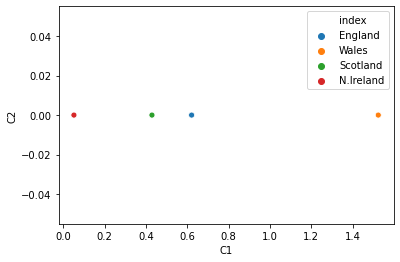

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='index',data=results)

<img src='https://github.com/iqbalamo93/Autoencoder/blob/master/ResuluV2.png?raw=true'>

Based on Other random seesd, you can see distinction of N.Ireland and Wales from rest